In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import sys
import os
import bungee
import cenote
import yaml
import pint

cenote.UREG.setup_matplotlib()

PATH = os.path.join(os.environ["SRC_DIR"], "examples", "115ft_30min.yaml")

plan = cenote.get_plan(PATH)
result = cenote.get_result(plan)

In [2]:
type(result.time)

pint.quantity.build_quantity_class.<locals>.Quantity

<IPython.core.display.Javascript object>


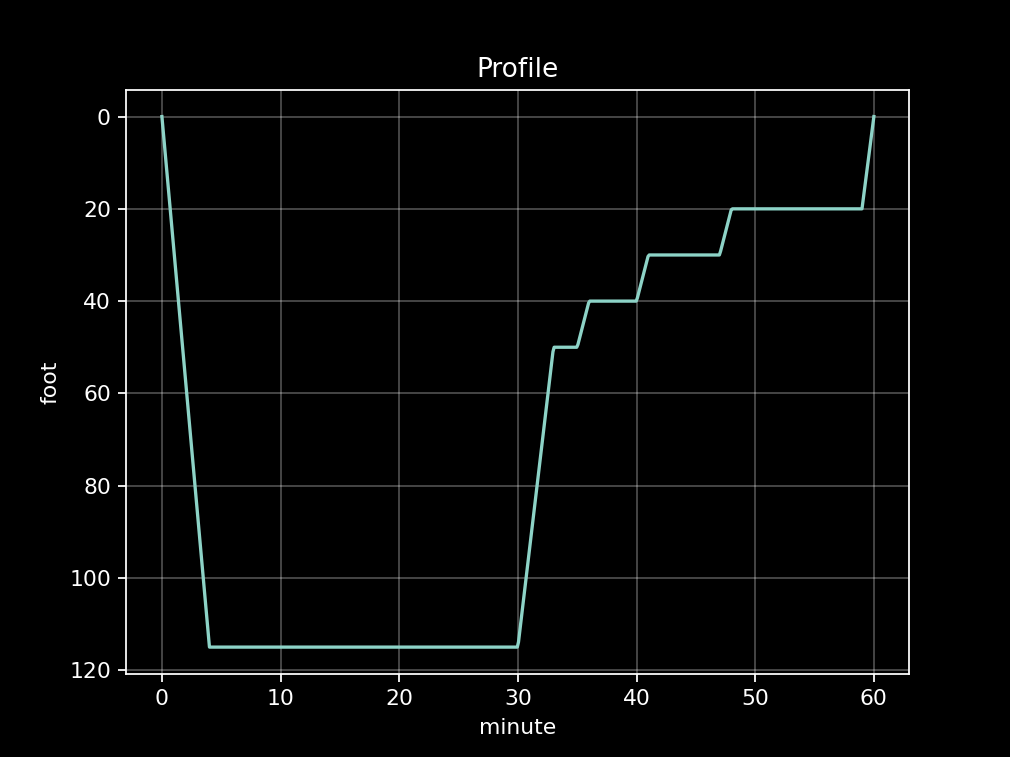

Text(0.5, 1.0, 'Profile')

In [3]:

# Depth
plt.figure()
plt.plot(result.time, result.depth)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.title("Profile")

<IPython.core.display.Javascript object>


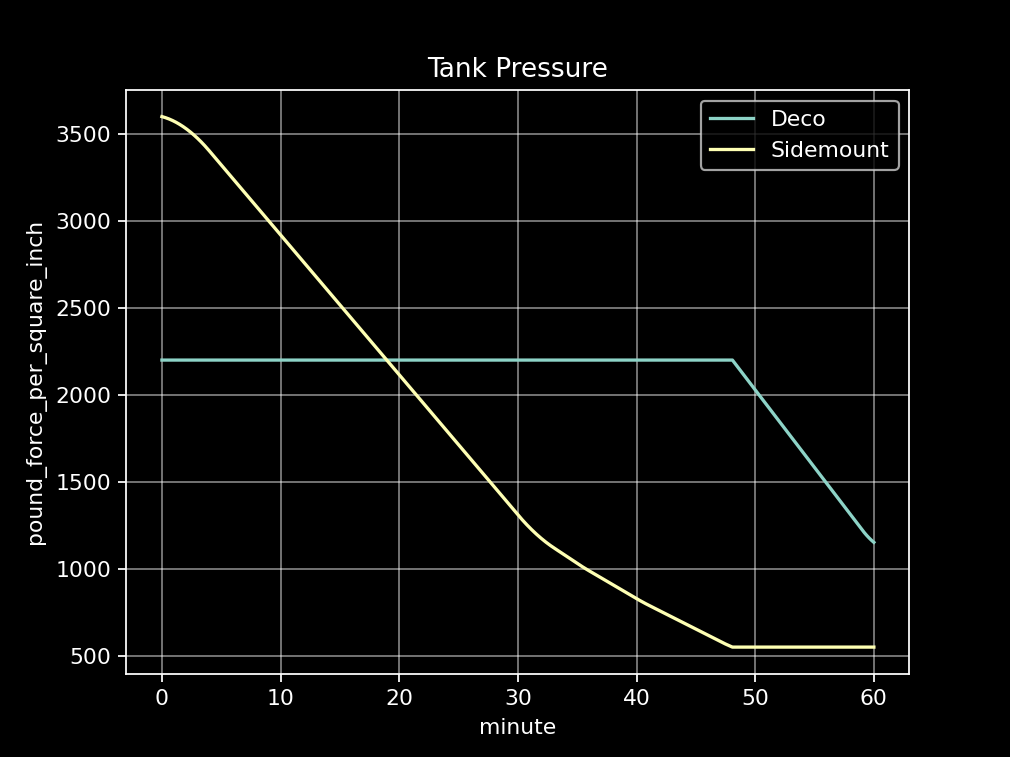

In [6]:
# Pressure
plt.figure()
for tank in result.pressure:
    plt.plot(result.time, result.pressure[tank], label=tank)
plt.grid(alpha=0.5)
plt.title("Tank Pressure")
plt.legend()